# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

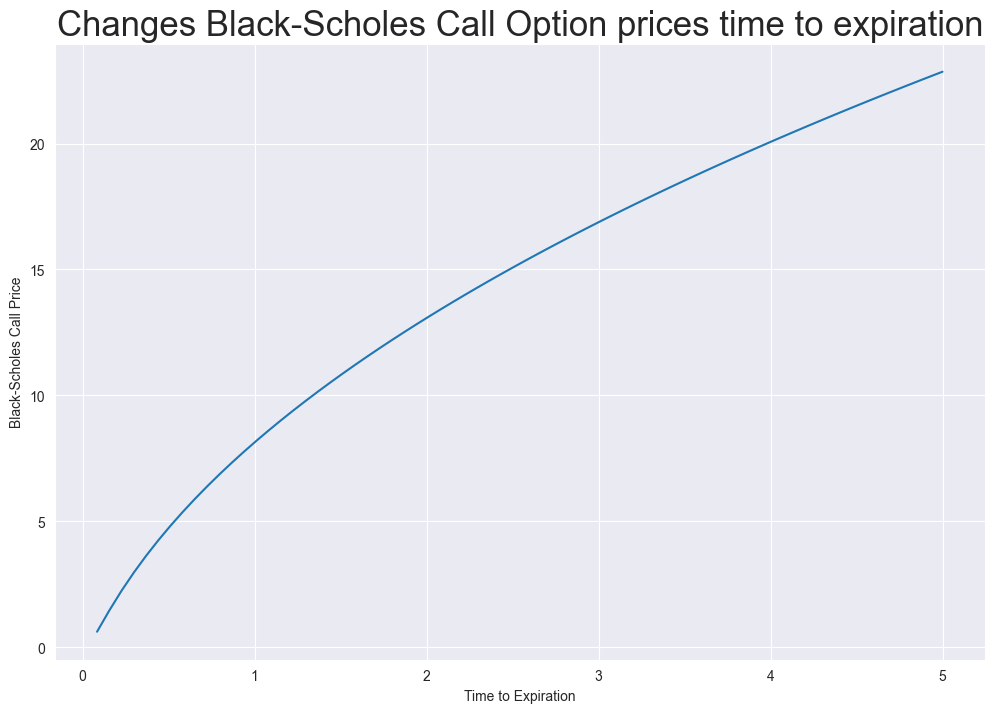

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

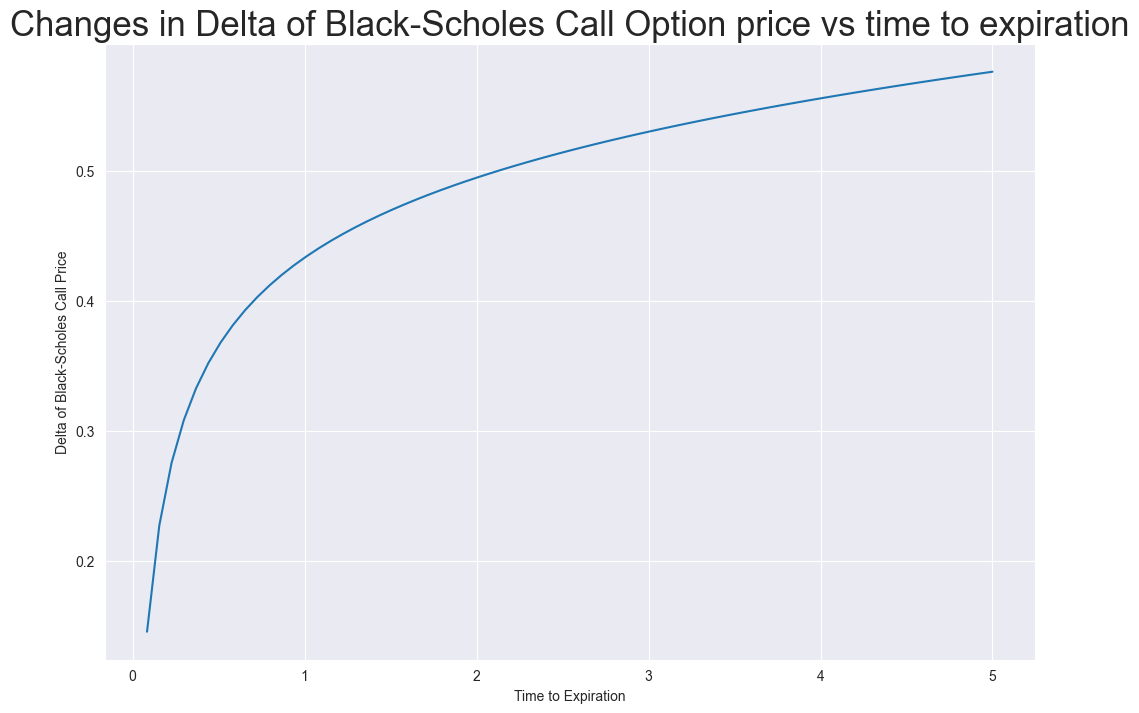

In [10]:

def delta_call(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1)


call_delta_prices = [delta_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes in Delta of Black-Scholes Call Option price vs time to expiration', size = 25)
plt.plot(times, call_delta_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Delta of Black-Scholes Call Price')
plt.show()

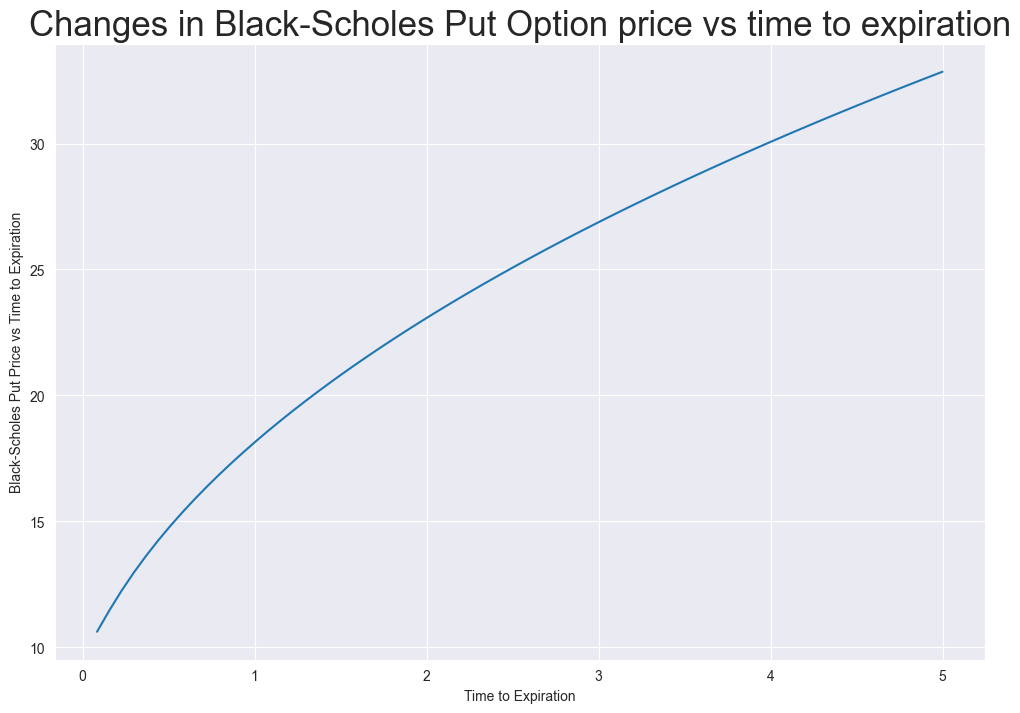

In [16]:
put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Changes in Black-Scholes Put Option price vs time to expiration', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price vs Time to Expiration')
plt.show()

as our time to expiration increases, we have slowing growth of price but overall growth of price for a put option. 

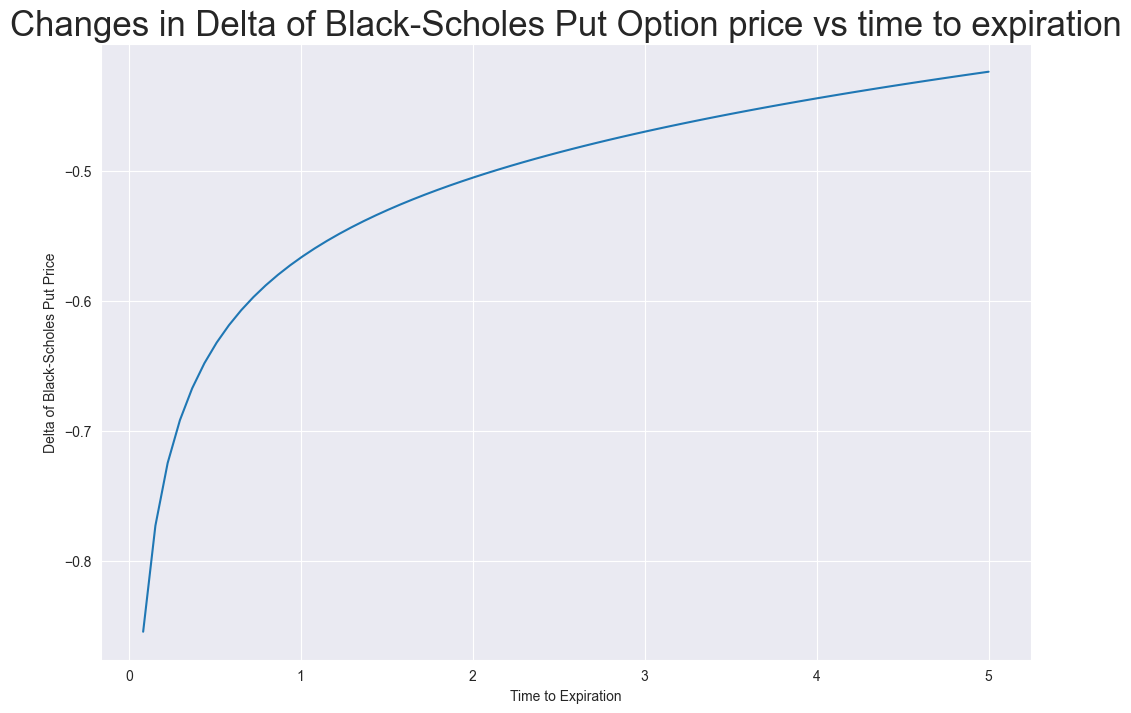

In [15]:
def delta_put(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return -norm.cdf(-d1)


put_delta_prices = [delta_put(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes in Delta of Black-Scholes Put Option price vs time to expiration', size = 25)
plt.plot(times, put_delta_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Delta of Black-Scholes Put Price')
plt.show()

**d)** Use the space below to record your observations and reflections based on the generated plots.


What we've observed is exactly what black-scholes predicts. 
if we treat T as the remaining time 'til expriation. the dC/dT and dP/dT terms are both positive. Both calls and puts are worth more the longer until expiry, as the time window gives more chance for the stock to move profitably, whereas the closer we get to a defined S_T, our prices will converge to the spot prices of a call and put, respectively. 

For our underlying delta, with the S_0, N(d1)>0 and N(d1)-1 <0. These are our call and put differentials wrt S_0, respectively. Call prices increae when S_0 goes up, and put prices fall when S_0 goes up. This makes sense, as our profits for them are S_T-K and K-S_T, respectively; thus as our underlying stock increases, our call increases in value and our put decreases. 